In [ ]:
pip install opencv-contrib-python

In [ ]:
pip install imutils

In [ ]:
pip install pytesseract

In [ ]:
import cv2
import imutils
import pytesseract

In [ ]:
from google.colab.patches import cv2_imshow

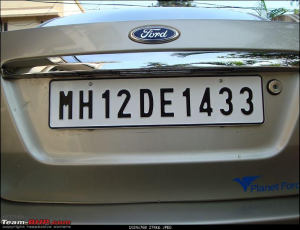

In [ ]:
image = cv2.imread('/content/d1.JPG')
image = imutils.resize(image, width=300 )
cv2_imshow(image)


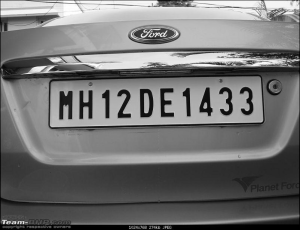

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)


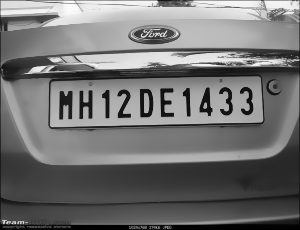

In [ ]:
gray_image = cv2.bilateralFilter(gray_image, 11, 17, 17)
cv2_imshow(gray_image)


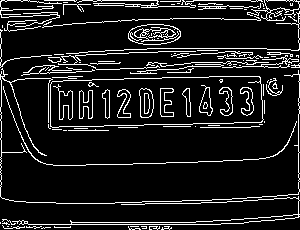

In [ ]:
edged = cv2.Canny(gray_image, 30, 200)
cv2_imshow( edged)

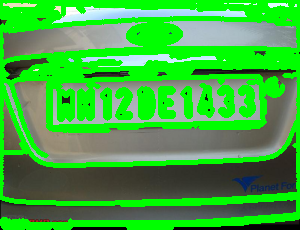

In [ ]:
cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image1=image.copy()
cv2.drawContours(image1,cnts,-1,(0,255,0),3)
cv2_imshow(image1)

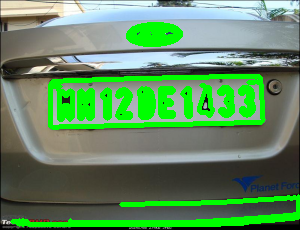

In [ ]:
cnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:30]
screenCnt = None
image2 = image.copy()
cv2.drawContours(image2,cnts,-1,(0,255,0),3)
cv2_imshow(image2)

In [ ]:
i=7
for c in cnts:
        perimeter = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)
        if len(approx) == 4:
                screenCnt = approx
                x,y,w,h = cv2.boundingRect(c)
                new_img=image[y:y+h,x:x+w]
                cv2.imwrite('./'+str(i)+'.png',new_img)
                i+=1
                break

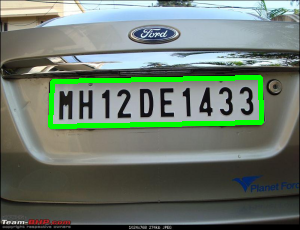

In [ ]:
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 3)
cv2_imshow( image)

In [ ]:
pip install pytesseract

In [ ]:
import pytesseract

In [ ]:
pytesseract.pytesseract.tesseract_cmd = r'"C:\Users\ADMIN\Downloads\tesseract-ocr-w64-setup-5.3.1.20230401.exe"'

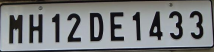

In [ ]:
Cropped_loc = './7.png'
cv2_imshow( cv2.imread(Cropped_loc))


In [ ]:
plate = pytesseract.image_to_string(Cropped_loc, lang='eng')
print("Number plate is:", plate)
cv2.waitKey(0)
cv2.destroyAllWindows()